<a href="https://colab.research.google.com/github/Pamela-YC-Cheng/Supply-Chain-Analytics/blob/main/Kaggle-%20Titanic%20Survival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train= pd.read_csv("C:\\Users\\pando\\OneDrive\\Desktop\\titanic\\train.csv")
df_test= pd.read_csv("C:\\Users\\pando\\OneDrive\\Desktop\\titanic\\test.csv")
df_data = df_train.append(df_test)

C:\Users\pando\AppData\Local\Temp\ipykernel_14904\2385858210.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = df_train.append(df_test)


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
num_rows, num_columns = df_train.shape
num_rows, num_columns

(891, 12)

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# See th rows that contain NaN in Age columns to see whether we should drop them
# Decided not to drop data that have NaN in Age while they are valuable
# Calculate the % of survived in these two groups

age_null10= df_train[df_train['Age'].isnull()].head()
age_null10

a_null= df_train[df_train['Age'].isnull()]['Survived']
rate_agenull= sum(a_null)/len(a_null)

all= df_train['Survived']
rate_all= sum(all)/ len(all)
print("% of Null Age ppl who survived", rate_agenull)
print("% of All ppl survived", rate_all)

% of Null Age ppl who survived 0.2937853107344633
% of All ppl survived 0.3838383838383838


In [ ]:
# Calculatee the % of survived of women and men

women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [ ]:
# Drop "Cabin" column while the missing values too many, might causing distortion in the prediction model
# Drop "Name" column while it contains no valuable information
df_train= df_train.drop(columns= "Cabin")
df_train= df_train.drop(columns= "Name")
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [ ]:
df_train= df_train.drop(columns="Ticket")

In [ ]:
# set male=0, women= 1 in "Sex" column
df_train["Sex"] = df_train["Sex"].replace("male",0)
df_train["Sex"] =  df_train["Sex"].replace("female",1)
#transform C=1, Q=2, S=3 (C = Cherbourg, Q = Queenstown, S = Southampton)
df_train["Embarked"] = df_train["Embarked"].replace("C",1)
df_train["Embarked"] = df_train["Embarked"].replace("Q",2)
df_train["Embarked"] = df_train["Embarked"].replace("S",3)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,3.0
3,4,1,1,1,35.0,1,0,53.1000,3.0
4,5,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,3.0
887,888,1,1,1,19.0,0,0,30.0000,3.0
888,889,0,3,1,NaN,1,2,23.4500,3.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [ ]:
df_train_anotnull= df_train[df_train['Age'].notnull()]
df_train_anotnull

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,3.0
3,4,1,1,1,35.0,1,0,53.1000,3.0
4,5,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,2.0
886,887,0,2,0,27.0,0,0,13.0000,3.0
887,888,1,1,1,19.0,0,0,30.0000,3.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


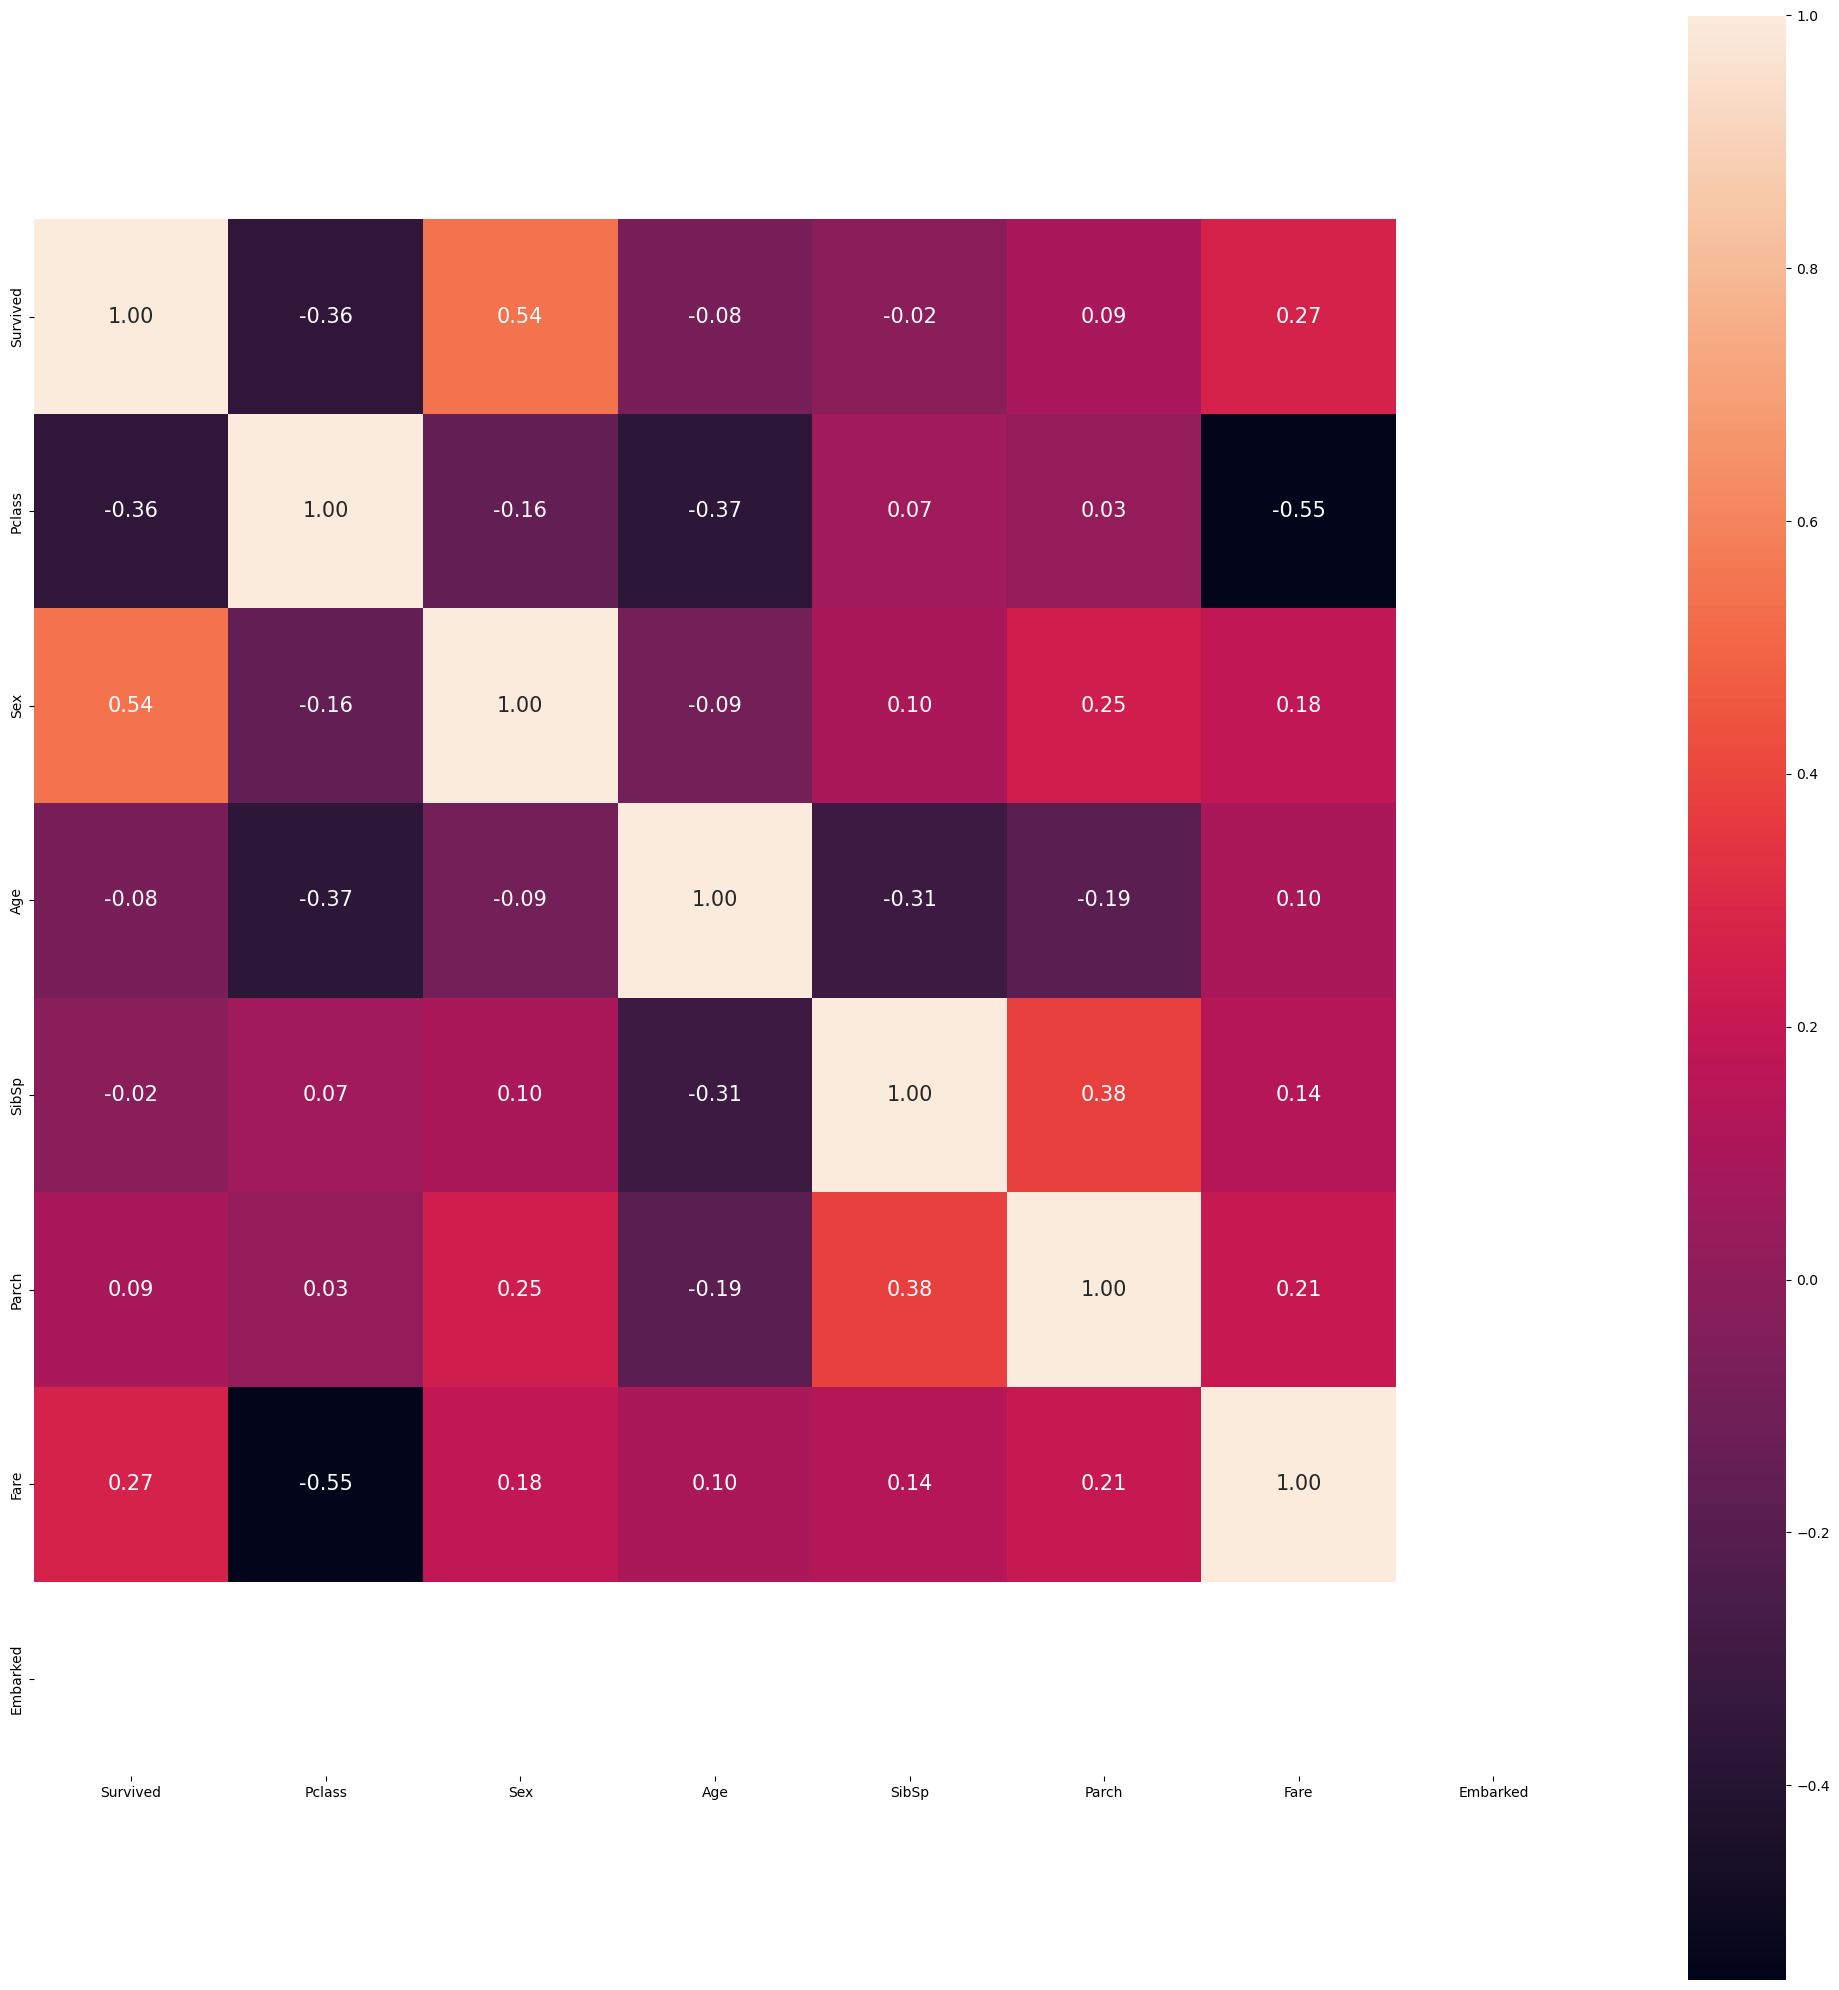

In [ ]:
#Plot heatmap to see if we should drop some of the attributes
cols= ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
cm = np.corrcoef(df_train_anotnull[cols].values.T) # returns correlation coefficients

plt.figure(figsize=(20, 20))  #adjust the plot size

# Heatmap visualisation of correlation coefficients
hm = sns.heatmap(cm,             # plot rectangular data as a color-encoded matrix
          cbar=True,         # whether to draw a colorbar
          annot=True,        # if True, write the data value in each cell
          square=True,       # if True, set the Axes aspect to “equal” so each cell will be square-shaped
          fmt='.2f',         # string formatting code to use when adding annotations
          annot_kws={'size': 15}, # keyword arguments for ax.text when annot is True (size of font)
          yticklabels=cols,  # if True, plot the column names of the dataframe.
          xticklabels=cols)

plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300) # Saves the figure in our local disk
plt.show()

In [ ]:
X= df_train.iloc[:,2:]
y= df_train.iloc[:, 1:2]

In [ ]:
X= df_train_anotnull[["Pclass", "Sex", "Age", "SibSp", "Parch"]]
y= df_train_anotnull.iloc[:, 1:2]
y = y.values.ravel()

In [ ]:
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

In [ ]:
# Build logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score



lr= LogisticRegression()
lr.fit(X_train1,y_train1)

score_lr = lr.score(X_test1, y_test1)
score_lr

0.8251748251748252

In [ ]:
#Build KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn= KNeighborsClassifier()
kn= knn.fit(X_train1,y_train1)

score_kn = kn.score(X_test1, y_test1)
score_kn

0.7902097902097902

In [ ]:
#Build Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy",
                             random_state=4,
                             splitter="random",
                             max_depth=3,
                             min_samples_leaf=10,
                             min_samples_split=10)

clf = clf.fit(X_train1, y_train1)
score = clf.score(X_test1, y_test1)
score


0.8111888111888111

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

In [ ]:
#Optimize the logistic

lr = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2'], 'random_state': range(1,31),}],
                  scoring='f1_macro',
                  cv=inner_cv)


lr = lr.fit(X,y)
print("\n Parameter Tuning ")
print("Non-nested CV f1_macro: ", lr.best_score_)
print("Optimal Parameter: ", lr.best_params_)
print("Optimal Estimator: ", lr.best_estimator_)
nested_score_lr = cross_val_score(lr, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_lr.mean(), " +/- ", nested_score_lr.std())


 Parameter Tuning 
Non-nested CV f1_macro:  0.7883212844007663
Optimal Parameter:  {'C': 1, 'penalty': 'l1', 'random_state': 1}
Optimal Estimator:  LogisticRegression(C=1, penalty='l1', random_state=1, solver='liblinear')
Nested CV f1_macro: 0.7905625062229426  +/-  0.04482542573922057


In [ ]:
#Optimize the kNN
pipe = Pipeline([
        ('knn', KNeighborsClassifier(p=2, metric='minkowski'))
         ] )
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

params = {
        'knn__n_neighbors': range(1,21),
        'knn__weights': ['uniform', 'distance']
    }

knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='recall_macro',
                  cv=inner_cv,
                  n_jobs=4)

knn = knn.fit(X,y)
print("\n Parameter Tuning ")
print("Non-nested CV f1_macro: ", knn.best_score_)
print("Optimal Parameter: ", knn.best_params_)
print("Optimal Estimator: ", knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_knn = cross_val_score(knn, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_knn.mean(), " +/- ", nested_score_knn.std())


 Parameter Tuning 
Non-nested CV recall_macro:  0.7570901943463222
Optimal Parameter:  {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('knn',
                 KNeighborsClassifier(n_neighbors=11, weights='distance'))])
Nested CV recall_macro:  0.7580656217392507  +/-  0.0248835047923741


In [ ]:
#Optimize the Decision Tree

dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

dt = dt.fit(X,y)
print("\n dt Parameter Tuning ")
print("Non-nested CV f1_macro: ", dt.best_score_)
print("Optimal Parameter: ", dt.best_params_)
print("Optimal Estimator: ", dt.best_estimator_)
nested_score_dt = cross_val_score(dt, X=X, y=y, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_dt.mean(), " +/- ", nested_score_dt.std())


 dt Parameter Tuning 
Non-nested CV f1_macro:  0.8005738025264645
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=4)
Nested CV f1_macro:  0.7916847828277429  +/-  0.04210917317931169


In [ ]:
drop_cols= ["Name", "Ticket", "Cabin","Fare", "Embarked"]
df_test2= df_test.drop(columns= drop_cols)
df_test2['Sex']=df_test2['Sex'].replace('male',0)
df_test2['Sex']=df_test2['Sex'].replace('female',1)


X_test= df_test2

In [ ]:
# Step 1: Store the PassengerId for later use
passenger_ids = X_test['PassengerId'].copy()

# Step 2: Drop PassengerId column from X_test before making predictions
X_test_modified = X_test.drop(columns='PassengerId')

print(X_test_modified.isnull().sum())

# Group by 'Pclass' and then sum the missing values for each group
missing_values_by_pclass = X_test_modified.groupby('Pclass').apply(lambda x: x.isnull().sum())

# Display the result
print(missing_values_by_pclass)

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64
        Pclass  Sex  Age  SibSp  Parch
Pclass                                
1            0    0    9      0      0
2            0    0    5      0      0
3            0    0   72      0      0


In [ ]:
med_age_c1= X_test_modified[X_test_modified['Pclass'] ==1]['Age'].median()
med_age_c2= X_test_modified[X_test_modified['Pclass'] ==2]['Age'].median()
med_age_c3= X_test_modified[X_test_modified['Pclass'] ==3]['Age'].median()

X_test_modified.loc[(X_test_modified['Pclass'] ==1) & (X_test_modified['Age'].isnull()), 'Age'] = med_age_c1
X_test_modified.loc[(X_test_modified['Pclass'] == 2) & (X_test_modified['Age'].isnull()), 'Age'] = med_age_c2
X_test_modified.loc[(X_test_modified['Pclass'] == 3) & (X_test_modified['Age'].isnull()), 'Age'] = med_age_c3

# Group by 'Pclass' and then sum the missing values for each group
missing_values_by_pclass = X_test_modified.groupby('Pclass').apply(lambda x: x.isnull().sum())

# Display the result
print(missing_values_by_pclass)

        Pclass  Sex  Age  SibSp  Parch
Pclass                                
1            0    0    0      0      0
2            0    0    0      0      0
3            0    0    0      0      0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_tree= DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=4)
best_tree.fit(X, y)

predictions = best_tree.predict(X_test_modified)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
#Let's Try Diff way: Use differnet model for data w age N data w/o age

In [ ]:
# Seperate
X_train_noage=df_train[df_train['Age'].isnull()][['Pclass', 'Sex', 'SibSp', 'Parch']]
y_train_noage=df_train[df_train['Age'].isnull()]['Survived']

X_train_wage=df_train[df_train['Age'].notnull()][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y_train_wage=df_train[df_train['Age'].notnull()]['Survived']

In [ ]:
#Optimize the Decision Tree


dt1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

dt1 = dt1.fit(X_train_noage,y_train__noage)
print("\n dt Parameter Tuning ")
print("Non-nested CV f1_macro: ", dt1.best_score_)
print("Optimal Parameter: ", dt1.best_params_)
print("Optimal Estimator: ", dt1.best_estimator_)
nested_score_dt1 = cross_val_score(dt1, X=X_train_noage, y=y_train__noage, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_dt1.mean(), " +/- ", nested_score_dt1.std())


 dt Parameter Tuning 
Non-nested CV f1_macro:  0.809589391824751
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=4, random_state=4)
Nested CV f1_macro:  0.7824306525009577  +/-  0.03486995002269691


In [ ]:
#Optimize the Decision Tree

dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

dt2 = dt2.fit(X_train_noage,y_train__noage)
print("\n dt Parameter Tuning ")
print("Non-nested CV f1_macro: ", dt2.best_score_)
print("Optimal Parameter: ", dt2.best_params_)
print("Optimal Estimator: ", dt2.best_estimator_)
nested_score_dt2 = cross_val_score(dt2, X=X_train_wage, y=y_train_wage, cv=outer_cv)
print("Nested CV f1_macro: ",nested_score_dt2.mean(), " +/- ", nested_score_dt2.std())


 dt Parameter Tuning 
Non-nested CV f1_macro:  0.8087724870045963
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=6, random_state=4)
Nested CV f1_macro:  0.8036877692942375  +/-  0.02912223413577796


In [ ]:
#Optimize the logistic

lr1 = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2'], 'random_state': range(1,31),}],
                  scoring='f1_macro',
                  cv=inner_cv)


lr1 = lr1.fit(X,y)
print("\n Parameter Tuning ")
print("Non-nested CV f1_macro: ", lr1.best_score_)
print("Optimal Parameter: ", lr1.best_params_)
print("Optimal Estimator: ", lr1.best_estimator_)
nested_score_lr1 = cross_val_score(lr1, X= X_train_noage, y= y_train_noage, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_lr1.mean(), " +/- ", nested_score_lr1.std())


 Parameter Tuning 
Non-nested CV f1_macro:  0.7870072546811748
Optimal Parameter:  {'C': 10, 'penalty': 'l1', 'random_state': 1}
Optimal Estimator:  LogisticRegression(C=10, penalty='l1', random_state=1, solver='liblinear')
Nested CV f1_macro: 0.8067736928842134  +/-  0.052981929851546705


In [ ]:
#Optimize the logistic

lr2 = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2'], 'random_state': range(1,31),}],
                  scoring='f1_macro',
                  cv=inner_cv)


lr2 = lr2.fit(X,y)
print("\n Parameter Tuning ")
print("Non-nested CV f1_macro: ", lr2.best_score_)
print("Optimal Parameter: ", lr2.best_params_)
print("Optimal Estimator: ", lr2.best_estimator_)
nested_score_lr2 = cross_val_score(lr2, X=X_train_wage, y=y_train_wage, cv=outer_cv)
print("Nested CV f1_macro:",nested_score_lr2.mean(), " +/- ", nested_score_lr2.std())


 Parameter Tuning 
Non-nested CV f1_macro:  0.794343221148274
Optimal Parameter:  {'C': 10, 'penalty': 'l1', 'random_state': 1}
Optimal Estimator:  LogisticRegression(C=10, penalty='l1', random_state=1, solver='liblinear')
Nested CV f1_macro: 0.79073695069879  +/-  0.04318292539226292


In [ ]:
#Decision Tree works better on both w no age and w age dataset
#I seperated dataset into two part> with age and without age, and further applied them with different models.

In [ ]:
df_test_noage= df_test[df_test['Age'].isnull()][["PassengerId",'Pclass', 'Sex',  'SibSp', 'Parch']]
df_test_wage= df_test[df_test['Age'].notnull()][["PassengerId",'Pclass', 'Sex', 'Age','SibSp', 'Parch']]

In [ ]:
df_test_noage_m= df_test_noage.drop(columns='PassengerId')
df_test_wage_m= df_test_wage.drop(columns='PassengerId')

df_test_noage_m['Sex']= df_test_noage_m['Sex'].replace('male',0)
df_test_noage_m['Sex']= df_test_noage_m['Sex'].replace('female',1)

df_test_wage_m['Sex']= df_test_wage_m['Sex'].replace('male',0)
df_test_wage_m['Sex']= df_test_wage_m['Sex'].replace('female',1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


best_t_noage= DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2,
                       random_state=4)
best_t_noage.fit(X_train_noage, y_train_noage)

predictions1 = best_t_noage.predict(df_test_noage_m)

output1 = pd.DataFrame({'PassengerId': df_test_noage.PassengerId, 'Survived': predictions1})



In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_t_wage= DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=1, min_samples_split=2,
                       random_state=4)
best_t_wage.fit(X_train_wage, y_train_wage)

predictions2 = best_t_wage.predict(df_test_wage_m)

output2 = pd.DataFrame({'PassengerId': df_test_wage.PassengerId, 'Survived': predictions2})

output_combine= pd.concat([output1, output2], ignore_index=True)
output_combine.to_csv('submission_combine.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
